In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
oo = pd.read_csv('olympics.csv', skiprows = 4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [3]:
lo = oo[oo.Edition == 2008]
lo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold


In [5]:
g=lo.groupby(['NOC','Medal']).size().unstack('Medal', fill_value = 0)
g = g.sort_values(['Gold','Silver','Bronze'], ascending = False)[['Gold','Silver','Bronze']]

In [6]:
g=g.transpose()
g

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


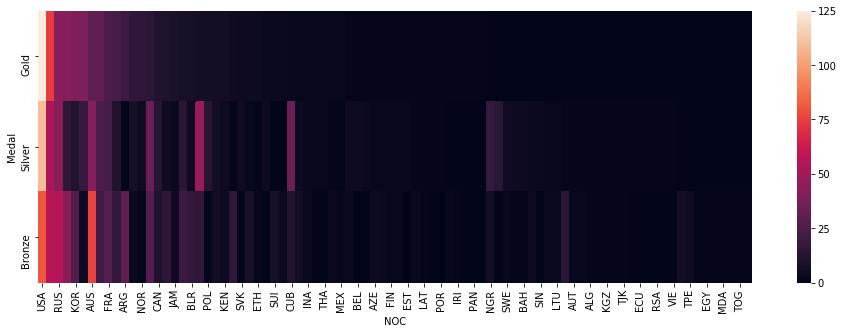

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(g);

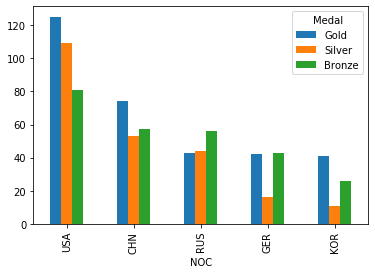

In [12]:
g=lo.groupby(['NOC','Medal']).size().unstack('Medal', fill_value = 0)
g
g.sort_values(['Gold','Silver','Bronze'], ascending = False)[['Gold','Silver','Bronze']].head().plot(kind = 'bar')

In [14]:
from matplotlib.colors import ListedColormap

In [15]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

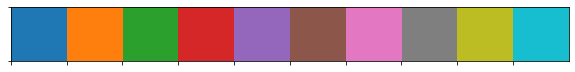

In [16]:
sns.palplot(sns.color_palette())

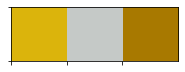

In [36]:
gsb = ['#dbb40c', '#c5c9c7', '#a87900']
sns.palplot(sns.color_palette(gsb))
my_gsb = ListedColormap(sns.color_palette(gsb))

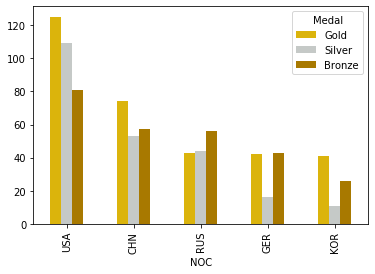

In [37]:
g=lo.groupby(['NOC','Medal']).size().unstack('Medal', fill_value = 0)
g
g=g.sort_values(['Gold','Silver','Bronze'], ascending = False)[['Gold','Silver','Bronze']].head()
g.plot(kind = 'bar', colormap =my_gsb)

In [51]:
gy = oo[oo.NOC == 'USA']
gy = gy.groupby(['Edition','Athlete','Medal']).size().unstack('Medal',fill_value=0)
gy['Total'] = gy['Gold'] + gy['Silver'] + gy['Bronze']
gy.reset_index(inplace = True)
tu = [group.sort_values('Total', ascending = False)[:1] for year , group in gy.groupby('Edition')]
tu

top = pd.DataFrame()
for i in tu:
    top = top.append(i)
top

Medal,Edition,Athlete,Bronze,Gold,Silver,Total
5,1896,"GARRETT, Robert",0,2,2,4
14,1900,"BAXTER, Irving",0,2,3,5
153,1904,"HEIDA, Anton",0,5,1,6
363,1908,"SHERIDAN, Martin",1,2,0,3
421,1912,"OSBURN, Carl Townsend",1,1,2,4
506,1920,"LEE, Willis",1,5,1,7
733,1924,"WEISSMULLER, Johnny",1,3,0,4
800,1928,"OSIPOWICH, Albina Lucy",0,2,0,2
859,1932,"DIDRIKSON, Mildred",0,2,1,3
1028,1936,"OWENS, Jesse",0,4,0,4
